# PART A:  BLOG AUTHORSHIP CORPUS

* DOMAIN: Digital content management
* CONTEXT: Classification is probably the most popular task that you would deal with in real life. Text in the form of blogs, posts, articles, etc.are written every second. It is a challenge to predict the information about the writer without knowing about him/her. We are going to create a classifier that predicts multiple features of the author of a given text. We have designed it as a Multi label classification problem.
* DATA DESCRIPTION: Over 600,000 posts from more than 19 thousand bloggers The Blog Authorship Corpus consists of the collected posts of 19,320 bloggers gathered from blogger.com in August 2004. The corpus incorporates a total of 681,288 posts and over 140 million words - or approximately 35 posts and 7250 words per person. Each blog is presented as a separate file, the name of which indicates a blogger id# and the blogger’s self-provided gender, age, industry, and astrological sign. (All are labelled for gender and age but for many, industry and/or sign is marked as unknown.) All bloggers included in the corpus fall into one of three age groups: 

    8240 "10s" blogs (ages 13-17),

    8086 "20s" blogs(ages 23-27) and

    2994 "30s" blogs (ages 33-47)

For each age group, there is an equal number of male and female bloggers. Each blog in the corpus includes at least 200 occurrences of common English words. All formatting has been stripped with two exceptions. Individual posts within a single blogger are separated by the date of the following post and links within a post are denoted by the label url link
* PROJECT OBJECTIVE: To build a NLP classifier which can use input text parameters to determine the label/s of the blog. Specific to this case study, you can consider the text of the blog: ‘text’ feature as independent variable and ‘topic’ as dependent variable

### IMPORT LIBRARIES

In [1]:
#pip install pandas-profiling

In [3]:
import numpy as np 
import pandas as pd
import re
from nltk.corpus import stopwords
from langdetect import detect
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem.snowball import SnowballStemmer
from zipfile import ZipFile
import warnings
warnings.filterwarnings('ignore')
#import pandas_profiling as pp
import seaborn as sns
import matplotlib as plt
%matplotlib inline

##### Read dataset from zip format

In [4]:
from zipfile import ZipFile
with ZipFile('blog.zip', 'r') as z:
 z.extractall()


In [5]:
df = pd.read_csv('blogtext.csv')

In [6]:
df.head(5)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [7]:
df.columns

Index(['id', 'gender', 'age', 'topic', 'sign', 'date', 'text'], dtype='object')

In [8]:
nRow,nCol = df.shape
print('There are ', nRow ,'rows', 'and',nCol ,'columns.'  )

There are  681284 rows and 7 columns.


In [9]:
#As the dataset is large, using fewer rows. 
#Limiting the data and using fewer rows as the data size is large
blog_df = df.head(10000)


In [10]:
blog_df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [11]:
#check the feature/columns  using the info method
blog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10000 non-null  int64 
 1   gender  10000 non-null  object
 2   age     10000 non-null  int64 
 3   topic   10000 non-null  object
 4   sign    10000 non-null  object
 5   date    10000 non-null  object
 6   text    10000 non-null  object
dtypes: int64(2), object(5)
memory usage: 547.0+ KB


In [12]:
blog_df.gender.value_counts()

male      5916
female    4084
Name: gender, dtype: int64

In [13]:
#Check for na if any
blog_df.isna().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

* No na values present in the given dataset

<AxesSubplot:xlabel='gender', ylabel='count'>

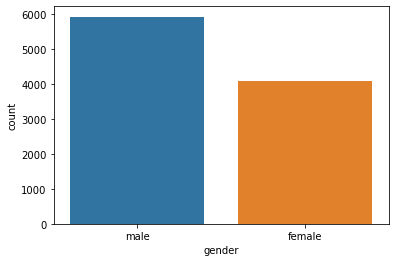

In [14]:
sns.countplot(x='gender',data=blog_df)

<AxesSubplot:xlabel='sign', ylabel='count'>

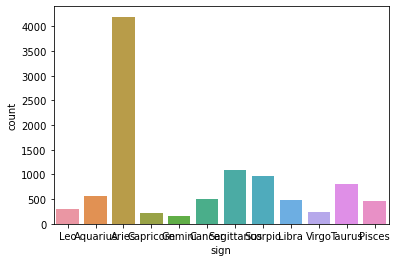

In [15]:
sns.countplot(x='sign',data=blog_df)

In [16]:
#chceck for null values
blog_df.isnull().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

* No null values present in the given dataset

#### Preprocess rows of the “text” column
a. Remove unwanted characters

b. Convert text to lowercase

c. Remove unwanted spaces

d. Remove stopwords

In [17]:
# Select only alphabets
import re
blog_df.text = blog_df.text.apply(lambda x: re.sub('[^A-Za-z]+', ' ', x))

# Convert text to lowercase
blog_df.text = blog_df.text.apply(lambda x: x.lower())

# Strip unwanted spaces
blog_df.text = blog_df.text.apply(lambda x: x.strip())

# Remove stopwords
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
blog_df.text = blog_df.text.apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))

In [18]:
blog_df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",info found pages mb pdf files wait untill team...
1,2059027,male,15,Student,Leo,"13,May,2004",team members drewes van der laag urllink mail ...
2,2059027,male,15,Student,Leo,"12,May,2004",het kader van kernfusie op aarde maak je eigen...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks yahoo toolbar capture urls popups means...


In [19]:
# drop id and date columns
blog_df.drop(labels=['id','date'], axis=1,inplace=True)

In [20]:
blog_df.head()

,gender,age,topic,sign,text
0,male,15,Student,Leo,info found pages mb pdf files wait untill team...
1,male,15,Student,Leo,team members drewes van der laag urllink mail ...
2,male,15,Student,Leo,het kader van kernfusie op aarde maak je eigen...
3,male,15,Student,Leo,testing testing
4,male,33,InvestmentBanking,Aquarius,thanks yahoo toolbar capture urls popups means...


As we want to make this into a multi-label classification problem, we need to merge all the label columns together, so that we have all the labels together for a particular sentence

In [21]:
blog_df['labels'] = blog_df.apply(lambda col : [col['gender'],col['age'],col['topic'],col['sign']], axis=1)

In [22]:
blog_df.head()

,gender,age,topic,sign,text,labels
0,male,15,Student,Leo,info found pages mb pdf files wait untill team...,"[male, 15, Student, Leo]"
1,male,15,Student,Leo,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,male,15,Student,Leo,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,male,15,Student,Leo,testing testing,"[male, 15, Student, Leo]"
4,male,33,InvestmentBanking,Aquarius,thanks yahoo toolbar capture urls popups means...,"[male, 33, InvestmentBanking, Aquarius]"


In [23]:
#drop  gender,age,topic & sign as they are already merged to labels column
blog_df.drop(columns=['gender','age','topic','sign'], axis=1, inplace=True)

In [24]:
blog_df.head()

,text,labels
0,info found pages mb pdf files wait untill team...,"[male, 15, Student, Leo]"
1,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,testing testing,"[male, 15, Student, Leo]"
4,thanks yahoo toolbar capture urls popups means...,"[male, 33, InvestmentBanking, Aquarius]"


### Separate features and labels, and split the data into training and testing

In [25]:
X= blog_df.text
y = blog_df.labels

In [26]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=2,test_size = 0.2)

In [27]:
print(X_train.shape)
print(y_train.shape)

(8000,)
(8000,)


In [28]:
print(X_test.shape)
print(y_test.shape)

(2000,)
(2000,)


In [29]:
X_test

7878    hi folks resident atlantan decided actually po...
3224     say miss life urllink cubeville happy holly days
1919    group apologize using blog way wanted let know...
4432    huge success wine club event wonderful guests ...
4835    well usually one follow sheep case started inn...
                              ...                        
9073    chris called job anyway said love g tried read...
8584    got e mail regarding first urllink post must a...
5390                    say already said ever first place
5092    best mood today lot fun last night sean came p...
2964    citizen appeal general time war home september...
Name: text, Length: 2000, dtype: object

### Vectorize the features
### a. Create a Bag of Words using count vectorizer

i. Use ngram_range=(1, 2)

ii. Vectorize training and testing features

b. Print the term-document matrix

In [30]:
cvect = CountVectorizer(ngram_range=(1,2))

In [31]:
#Feed SMS data to CountVectorizer
cvect.fit(X_train)

#Check the vocablury size
len(cvect.vocabulary_)

533783

In [32]:
cvect.get_feature_names()

['aa',
 'aa amazing',
 'aa anger',
 'aa keeps',
 'aa nice',
 'aa sd',
 'aaa',
 'aaa discount',
 'aaa joe',
 'aaa looks',
 'aaa rated',
 'aaa take',
 'aaa travel',
 'aaaa',
 'aaaa jet',
 'aaaaaaaaaaaah',
 'aaaaaaaaaaahhhhhhhhhhhhhhhhhhh',
 'aaaaaaaaaaahhhhhhhhhhhhhhhhhhh hw',
 'aaaaaaaaah',
 'aaaaaaah',
 'aaaaaaah fade',
 'aaaaaawwwwww',
 'aaaaaawwwwww gets',
 'aaaaack',
 'aaaaahhhh',
 'aaaaahhhh heath',
 'aaaahh',
 'aaaarrrgghhhh',
 'aaaarrrgghhhh slightly',
 'aaagh',
 'aaagh pero',
 'aaah',
 'aaah eat',
 'aaahhh',
 'aaahhh cryptic',
 'aaahhhh',
 'aaahhhh diva',
 'aaahing',
 'aaahing much',
 'aaarrggghhh',
 'aaarrggghhh plus',
 'aaarrggghhh thanks',
 'aaarrrggghhhhhhhhgggghhhhhh',
 'aaarrrggghhhhhhhhgggghhhhhh dropped',
 'aaarrrrggggghhhhh',
 'aaarrrrggggghhhhh realized',
 'aactually',
 'aactually really',
 'aahed',
 'aahed god',
 'aahh',
 'aahh gw',
 'aal',
 'aal eliminate',
 'aal esseneth',
 'aal lost',
 'aal rather',
 'aaldering',
 'aaldering urllink',
 'aamco',
 'aamco kind',
 'aan

In [33]:
X_train_ct = cvect.transform(X_train)

In [34]:
type(X_train_ct)

scipy.sparse.csr.csr_matrix

In [35]:
X_train_ct

<8000x533783 sparse matrix of type '<class 'numpy.int64'>'
	with 1150077 stored elements in Compressed Sparse Row format>

In [36]:
X_train_ct[0]

<1x533783 sparse matrix of type '<class 'numpy.int64'>'
	with 316 stored elements in Compressed Sparse Row format>

In [37]:
X_test_ct = cvect.transform(X_test)

In [38]:
X_test_ct[0]

<1x533783 sparse matrix of type '<class 'numpy.int64'>'
	with 204 stored elements in Compressed Sparse Row format>

In [39]:
cvect.get_feature_names()[:10]

['aa',
 'aa amazing',
 'aa anger',
 'aa keeps',
 'aa nice',
 'aa sd',
 'aaa',
 'aaa discount',
 'aaa joe',
 'aaa looks']

In [40]:
print(X_train_ct)

  (0, 11029)	1
  (0, 11075)	1
  (0, 13110)	1
  (0, 13579)	1
  (0, 18486)	1
  (0, 18692)	1
  (0, 26755)	1
  (0, 26762)	1
  (0, 27624)	1
  (0, 27683)	1
  (0, 32919)	1
  (0, 33042)	1
  (0, 35371)	1
  (0, 35372)	1
  (0, 39164)	1
  (0, 39165)	1
  (0, 40431)	1
  (0, 40674)	1
  (0, 41772)	1
  (0, 41810)	1
  (0, 42597)	1
  (0, 42820)	1
  (0, 44206)	1
  (0, 44265)	1
  (0, 48442)	1
  :	:
  (7999, 427915)	1
  (7999, 432757)	1
  (7999, 432763)	1
  (7999, 439219)	1
  (7999, 439665)	1
  (7999, 463888)	1
  (7999, 464142)	1
  (7999, 464619)	1
  (7999, 465278)	1
  (7999, 466399)	1
  (7999, 466437)	1
  (7999, 472203)	1
  (7999, 472473)	1
  (7999, 473572)	1
  (7999, 473937)	1
  (7999, 475168)	1
  (7999, 475327)	1
  (7999, 483679)	1
  (7999, 483871)	1
  (7999, 491639)	1
  (7999, 491740)	1
  (7999, 495803)	1
  (7999, 496006)	1
  (7999, 516414)	1
  (7999, 516548)	1


In [41]:
print(X_test_ct)

  (0, 336)	1
  (0, 359)	1
  (0, 1820)	1
  (0, 3268)	1
  (0, 3661)	1
  (0, 8474)	1
  (0, 8487)	1
  (0, 11888)	1
  (0, 12154)	1
  (0, 12832)	1
  (0, 19705)	1
  (0, 27414)	1
  (0, 27431)	1
  (0, 28349)	1
  (0, 30983)	1
  (0, 34320)	1
  (0, 34791)	1
  (0, 34792)	1
  (0, 36961)	1
  (0, 37532)	1
  (0, 55431)	1
  (0, 57677)	1
  (0, 59919)	1
  (0, 61587)	1
  (0, 61915)	1
  :	:
  (1999, 514060)	1
  (1999, 516672)	1
  (1999, 517667)	1
  (1999, 518588)	1
  (1999, 518738)	1
  (1999, 519834)	1
  (1999, 520949)	2
  (1999, 521210)	1
  (1999, 521233)	1
  (1999, 521581)	1
  (1999, 522216)	1
  (1999, 523270)	2
  (1999, 523908)	1
  (1999, 524770)	5
  (1999, 525125)	1
  (1999, 525167)	1
  (1999, 525336)	2
  (1999, 525870)	1
  (1999, 526501)	2
  (1999, 526748)	1
  (1999, 526779)	1
  (1999, 529486)	2
  (1999, 529627)	1
  (1999, 529751)	1
  (1999, 530881)	2


Create a dictionary to get the count of every label i.e. the key will be label name and value will be the total count of the label

In [42]:
label_counts=dict()

for labels in blog_df.labels.values:
    for label in labels:
        if label in label_counts:
            label_counts[str(label)]+=1
        else:
            label_counts[str(label)]=1

In [43]:
label_counts

{'male': 5916,
 '15': 1,
 'Student': 1137,
 'Leo': 301,
 '33': 1,
 'InvestmentBanking': 70,
 'Aquarius': 571,
 'female': 4084,
 '14': 1,
 'indUnk': 3287,
 'Aries': 4198,
 '25': 1,
 'Capricorn': 215,
 '17': 1,
 'Gemini': 150,
 '23': 1,
 'Non-Profit': 71,
 'Cancer': 504,
 'Banking': 16,
 '37': 1,
 'Sagittarius': 1097,
 '26': 1,
 '24': 1,
 'Scorpio': 971,
 '27': 1,
 'Education': 270,
 '45': 1,
 'Engineering': 127,
 'Libra': 491,
 'Science': 63,
 '34': 1,
 '41': 1,
 'Communications-Media': 99,
 'BusinessServices': 91,
 'Sports-Recreation': 80,
 'Virgo': 236,
 'Taurus': 812,
 'Arts': 45,
 'Pisces': 454,
 '44': 1,
 '16': 1,
 'Internet': 118,
 'Museums-Libraries': 17,
 'Accounting': 4,
 '39': 1,
 '35': 1,
 'Technology': 2654,
 '36': 1,
 'Law': 11,
 '46': 1,
 'Consulting': 21,
 'Automotive': 14,
 '42': 1,
 'Religion': 9,
 '13': 1,
 'Fashion': 1622,
 '38': 1,
 '43': 1,
 'Publishing': 4,
 '40': 1,
 'Marketing': 156,
 'LawEnforcement-Security': 10,
 'HumanResources': 2,
 'Telecommunications': 2}

### Transform the labels
As we have noticed before, in this task each example can have multiple tags. To deal with such kind of prediction, we need to transform labels in a binary form and the prediction will be a mask of 0s and 1s. For this purpose, it is convenient to use MultiLabelBinarizer from sklearn 

a). Convert your train and test labels using MultiLabelBinarizer


In [44]:
from sklearn.preprocessing import MultiLabelBinarizer
binarizer=MultiLabelBinarizer(classes=sorted(label_counts.keys()))

In [45]:
y_train = binarizer.fit_transform(y_train)

In [46]:
y_test = binarizer.transform(y_test)
y_test

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

## Building a Classifier using Count Vectorizer

Use a linear classifier of your choice, wrap it up in OneVsRestClassifier to train it on every label.
Tried with all possible classifier algorithms
* Logistic Regression
* KNN
* Decision tree
* SVM
* Randomfores

In [47]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [48]:
model=LogisticRegression(solver='lbfgs', max_iter=100)
model=OneVsRestClassifier(model)
model.fit(X_train_ct,y_train)

OneVsRestClassifier(estimator=LogisticRegression())

In [49]:
Ypred_lgr=model.predict(X_test_ct)

In [50]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

def display_metrics_micro(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: Micro', f1_score(Ytest, Ypred, average='micro'))
    print('Average precision score: Micro', average_precision_score(Ytest, Ypred, average='micro'))
    print('Average recall score: Micro', recall_score(Ytest, Ypred, average='micro'))
    
    

In [51]:
display_metrics_micro(y_test,Ypred_lgr)

Accuracy score:  0.3045
F1 score: Micro 0.6461819288104655
Average precision score: Micro 0.46015220716783223
Average recall score: Micro 0.531


### Print true label and predicted label for random examples

In [52]:
preds = Ypred_lgr[:15]
actuals = y_test[:15]

In [53]:
print(binarizer.inverse_transform(Ypred_lgr)[877])
print(binarizer.inverse_transform(y_test)[877])

('Aries', 'Fashion', 'male')
('Aries', 'Fashion', 'male')


In [54]:
print(binarizer.inverse_transform(Ypred_lgr)[500])
print(binarizer.inverse_transform(y_test)[500])

('male',)
('Aries', 'Technology', 'male')


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def build_model_train(X_train, y_train, X_valid=None, y_valid=None, C= 1.0, model='lr'):
    if model=='lr':
        model = LogisticRegression(C=C, penalty='l1', dual=False, solver='liblinear')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
    
    elif model=='svm':
        model = LinearSVC(C=C, penalty='l1', dual=False, loss='squared_hinge')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
    
    elif model=='nbayes':
        model = MultinomialNB(alpha=1.0)
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
        
    elif model=='lda':
        model = LinearDiscriminantAnalysis(solver='svd')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
     
    elif model=='knn':
        model = KNeighborsClassifier()
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
        
    elif model=='decisiontree':
        model = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
        
    elif model=='randomforest':
        model = RandomForestClassifier(n_estimators=50 ,criterion = 'entropy',random_state=42)  
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
            
    return model

In [56]:
models = ['lr','svm','nbayes','knn','decisiontree','randomforest']
for model in models:
    model = build_model_train(X_train_ct,y_train,model=model)
    model.fit(X_train_ct,y_train)
    Ypred=model.predict(X_test_ct)
    print("\n")
    print(f"**displaying  metrics for the mode {model}\n")
    display_metrics_micro(y_test,Ypred)
    print("\n")
    print("\n")
   



**displaying  metrics for the mode OneVsRestClassifier(estimator=LogisticRegression(penalty='l1',
                                                 solver='liblinear'))

Accuracy score:  0.323
F1 score: Micro 0.6587982832618025
Average precision score: Micro 0.4675025747687362
Average recall score: Micro 0.5628333333333333






**displaying  metrics for the mode OneVsRestClassifier(estimator=LinearSVC(dual=False, penalty='l1'))

Accuracy score:  0.285
F1 score: Micro 0.6341413311421528
Average precision score: Micro 0.447881340337259
Average recall score: Micro 0.5145






**displaying  metrics for the mode OneVsRestClassifier(estimator=MultinomialNB())

Accuracy score:  0.0605
F1 score: Micro 0.49669258442613445
Average precision score: Micro 0.3218133637434722
Average recall score: Micro 0.3566666666666667






**displaying  metrics for the mode OneVsRestClassifier(estimator=KNeighborsClassifier())

Accuracy score:  0.059
F1 score: Micro 0.3293180493491354
Average precision score

* On trying different classifier, Logistic Regression and SVM are performing better when compare to other classifier algorithms
* On applying Logistic regression, we have achieved accuracy of 32.3% and performance can be still improved by increasing the parameter "C" in logistic regression.
* Also, SVM contribute to medium level accuracy of 28.5%.


##### Logistic regression and SVM were considered for further hyper parameter tuning


### Applying hyperparameter tuning on LOGISTIC REGRESSION AND SVM by changing "C" value 

In [98]:
# C = 2.0
def better_model_train(X_train, y_train, X_valid=None, y_valid=None, C= 2.0, model='lr'):
    if model=='lr':
        model = LogisticRegression(C=C, penalty='l1', dual=False, solver='liblinear')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
    
    elif model=='svm':
        model = LinearSVC(C=C, penalty='l1', dual=False, loss='squared_hinge')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
            
    return model

In [89]:
eval_models = ['lr','svm']
for model in eval_models:
    model = better_model_train(X_train_ct,y_train, model = model)
    model.fit(X_train_ct,y_train)
    Ypred=model.predict(X_test_ct)
    print("\n")
    print(f"**displaying  metrics for the mode {model1}\n")
    display_metrics_micro(y_test,Ypred)
    
   



**displaying  metrics for the mode ['lr', 'svm']

Accuracy score:  0.347
F1 score: Micro 0.6715149225538346
Average precision score: Micro 0.4781986636333915
Average recall score: Micro 0.5925


**displaying  metrics for the mode ['lr', 'svm']

Accuracy score:  0.286
F1 score: Micro 0.6325048583410043
Average precision score: Micro 0.44459078247727474
Average recall score: Micro 0.5153333333333333


 On changing "C" value from 1.0 to 2.0, the accuracy score has raised 
  * from 32.5 to 34.7% for Logistic regression
  * from 28.5% to 28.6% for SVM
 

In [96]:
#C = 3.5
def better_model_train_1(X_train, y_train, X_valid=None, y_valid=None, C= 3.5, model='lr'):
    if model=='lr':
        model = LogisticRegression(C=C, penalty='l1', dual=False, solver='liblinear')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
    
    elif model=='svm':
        model = LinearSVC(C=C, penalty='l1', dual=False, loss='squared_hinge')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
            
    return model

In [97]:
eval_models = ['lr','svm']
for model in eval_models:
    model = better_model_train_1(X_train_ct,y_train, model = model)
    model.fit(X_train_ct,y_train)
    Ypred=model.predict(X_test_ct)
    print("\n")
    print(f"**displaying  metrics for the mode {model1}\n")
    display_metrics_micro(y_test,Ypred)
    



**displaying  metrics for the mode ['lr', 'svm']

Accuracy score:  0.3515
F1 score: Micro 0.6746853146853146
Average precision score: Micro 0.4803350892857142
Average recall score: Micro 0.603


**displaying  metrics for the mode ['lr', 'svm']

Accuracy score:  0.2795
F1 score: Micro 0.6243331965531391
Average precision score: Micro 0.4348700167867307
Average recall score: Micro 0.5071666666666667


 * On changing "C" value from 1.0 to 3.5, the accuracy score has raised a pretty high for Logistic regression from 32.5% to 35.15% 
 * Therefore, on applying Countvectorizer on LOgististic REgression, the accuracy score of 35.15% is achieved.
 
 ##### Let us try on TD-IDF VECTORIZER for model evaluation
 

### TD-IDF Vectorizer

In [57]:
# extract the tfid representation matrix of the text data
from sklearn.feature_extraction.text import TfidfVectorizer
# create the transform
tfidf = TfidfVectorizer(stop_words= 'english')
# tokenize and build vocab
tfidf.fit(X)
# summarize
print(tfidf.vocabulary_)
print(tfidf.idf_)

{'info': 21476, 'pages': 30636, 'mb': 26398, 'pdf': 31215, 'files': 15704, 'wait': 46694, 'untill': 45617, 'team': 42653, 'leader': 24261, 'processed': 33357, 'learns': 24304, 'html': 20356, 'members': 26678, 'drewes': 12680, 'van': 45972, 'der': 11154, 'laag': 23877, 'urllink': 45767, 'mail': 25721, 'ruiyu': 36666, 'xie': 48154, 'bryan': 5443, 'aaldering': 27, 'het': 19642, 'kader': 23067, 'kernfusie': 23314, 'op': 29928, 'aarde': 31, 'maak': 25531, 'je': 22539, 'eigen': 13372, 'waterstofbom': 46940, 'build': 5559, 'bomb': 4705, 'ascott': 2330, 'tartarus': 42538, 'uwa': 45885, 'edu': 13246, 'au': 2697, 'andrew': 1530, 'scott': 37488, 'newsgroups': 28845, 'rec': 34763, 'humor': 20451, 'subject': 41447, 'humorous': 20452, 'date': 10440, 'feb': 15426, 'gmt': 17823, 'organization': 30096, 'university': 45409, 'western': 47218, 'australia': 2769, 'original': 30124, 'file': 15700, 'dated': 10441, 'th': 43046, 'november': 29291, 'transcript': 44134, 'seven': 38091, 'days': 10494, 'article': 

In [58]:
# encode document
X_train_tfidf = tfidf.transform(X_train)
# summarize encoded vector
print(X_train_tfidf.shape)

(8000, 48750)


In [59]:
#Test data TF-IDF
X_test_tfidf  = tfidf.transform(X_test)
print(X_test_tfidf.shape)



(2000, 48750)


### Building a Classifier using TF-IDF Vectorizer

In [60]:
models = ['lr','svm','nbayes','knn','decisiontree','randomforest']
for model in models:
    model = build_model_train(X_train_tfidf,y_train,model=model)
    model.fit(X_train_tfidf,y_train)
    Ypred=model.predict(X_test_tfidf)
    print("\n")
    print(f"**displaying  metrics for the mode {model}\n")
    display_metrics_micro(y_test,Ypred)
    print("\n")
    



**displaying  metrics for the mode OneVsRestClassifier(estimator=LogisticRegression(penalty='l1',
                                                 solver='liblinear'))

Accuracy score:  0.211
F1 score: Micro 0.5355406344061124
Average precision score: Micro 0.36681132131349503
Average recall score: Micro 0.3855




**displaying  metrics for the mode OneVsRestClassifier(estimator=LinearSVC(dual=False, penalty='l1'))

Accuracy score:  0.2285
F1 score: Micro 0.5493451824134705
Average precision score: Micro 0.3888813920454546
Average recall score: Micro 0.3915




**displaying  metrics for the mode OneVsRestClassifier(estimator=MultinomialNB())

Accuracy score:  0.015
F1 score: Micro 0.43103656329190304
Average precision score: Micro 0.26538040874143715
Average recall score: Micro 0.2976666666666667




**displaying  metrics for the mode OneVsRestClassifier(estimator=KNeighborsClassifier())

Accuracy score:  0.0355
F1 score: Micro 0.308933605521532
Average precision score: Micro 0.13262

ALGORITHMS "Logistic Regression" and "SVM"  produce medium accuracy score than other algorithms. So, hyperparameter tuning is applied on these two algorithms BY changing 'C' value

In [99]:
C = 3.5
models = ['lr','svm']
for model in models:
    model = better_model_train_1(X_train_tfidf,y_train,model=model)
    model.fit(X_train_tfidf,y_train)
    Ypred=model.predict(X_test_tfidf)
    print("\n")
    print(f"**displaying  metrics for the mode {model}\n")
    display_metrics_micro(y_test,Ypred)
    print("\n")
    



**displaying  metrics for the mode OneVsRestClassifier(estimator=LogisticRegression(C=3.5, penalty='l1',
                                                 solver='liblinear'))

Accuracy score:  0.3125
F1 score: Micro 0.6449357326478148
Average precision score: Micro 0.46239719239373595
Average recall score: Micro 0.5226666666666666




**displaying  metrics for the mode OneVsRestClassifier(estimator=LinearSVC(C=3.5, dual=False, penalty='l1'))

Accuracy score:  0.285
F1 score: Micro 0.610793924377895
Average precision score: Micro 0.4327489505597015
Average recall score: Micro 0.4725




### Summary:

1. Count Vectorizer on Logistic Regression model('C': 1.0-->3.5) :
    * Accuracy score before hyperparameter tuning: 32.5%
    * Accuracy score after hyperparameter tuning: 35.15%
    
2. TF-IDF on Logistic Regression model ('C': 1.0-->3.5):
    * Accuracy score before hyperparameter tuning: 21.1%
    * Accuracy score after hyperparameter tuning: 31.25%
    
3. Count Vectorizer on SVM model ('C': 1.0-->2.0):
    * Accuracy score before hyperparameter tuning: 28.5%
    * Accuracy score after hyperparameter tuning: 28.6%

4. TF-IDF on SVM model ('C': 1.0-->3.5):
    * Accuracy score before hyperparameter tuning: 22.85%
    * Accuracy score after hyperparameter tuning: 28.5% 
    
    
5. Based on computation time and performance metrics, Count vectorizer performs well compare to TF_IDF vectorizer

6. "Logistic Regression" is considered as most prefered model than other classifiers based on its "accuracy" score

7. we can visualize the performance of multi-class models according to their one-vs-all precision-recall curves. The AUC can also be generalized to the multi-class setting

## CUSTOMER SUPPORT_RULE BASED CHATBOT

In [61]:
#import libraries
import nltk
from nltk.stem.lancaster import LancasterStemmer #Lancaster Stemmer
stemmer = LancasterStemmer()

#Tensor flow
import tflearn
import tensorflow as tf
import numpy as np
import json
import random


Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


# Importing corpus
1.intents:
    a) Tag: Target variable
    b) Patterns: Training data for bot
    c) Response: Bot replies

In [62]:
with open('GL+Bot.json')as file:
    corpus=json.load(file)
print(corpus)

{'intents': [{'tag': 'Intro', 'patterns': ['hi', 'how are you', 'is anyone there', 'hello', 'whats up', 'hey', 'yo', 'listen', 'please help me', 'i am learner from', 'i belong to', 'aiml batch', 'aifl batch', 'i am from', 'my pm is', 'blended', 'online', 'i am from', 'hey ya', 'talking to you for first time'], 'responses': ['Hello! how can i help you ?'], 'context_set': ''}, {'tag': 'Exit', 'patterns': ['thank you', 'thanks', 'cya', 'see you', 'later', 'see you later', 'goodbye', 'i am leaving', 'have a Good day', 'you helped me', 'thanks a lot', 'thanks a ton', 'you are the best', 'great help', 'too good', 'you are a good learning buddy'], 'responses': ['I hope I was able to assist you, Good Bye'], 'context_set': ''}, {'tag': 'Olympus', 'patterns': ['olympus', 'explain me how olympus works', 'I am not able to understand olympus', 'olympus window not working', 'no access to olympus', 'unable to see link in olympus', 'no link visible on olympus', 'whom to contact for olympus', 'lot of p

### Data Preprocessing

In [63]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Gayathri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [64]:
#Extract data:
W = [] #tokens
L = [] #identified labels
doc_x = [] #Tokenised words
doc_y = [] #tags or labels


for intent in corpus['intents']:
    for pattern in intent['patterns']:
        w_temp = nltk.word_tokenize(pattern)
        W.extend(w_temp)
        doc_x.append(w_temp)
        doc_y.append(intent['tag'])
        
    #adding missing tag if any:
    if intent['tag']not in L:
         L.append(intent['tag'])
            

In [65]:
#Stemming
W = [stemmer.stem(w.lower()) for w in W if w!= "?"]  #stemming or learning root word
W = sorted(list(set(W))) #sorted words
L = sorted(L)  #sorted list of labels
W

['a',
 'abl',
 'access',
 'act',
 'ad',
 'adam',
 'aifl',
 'aiml',
 'am',
 'an',
 'anyon',
 'ar',
 'art',
 'backward',
 'bad',
 'bag',
 'batch',
 'bay',
 'belong',
 'best',
 'blend',
 'bloody',
 'boost',
 'bot',
 'buddy',
 'class',
 'contact',
 'cre',
 'cross',
 'cya',
 'day',
 'deep',
 'did',
 'diffult',
 'do',
 'ensembl',
 'epoch',
 'explain',
 'first',
 'for',
 'forest',
 'forward',
 'from',
 'funct',
 'good',
 'goodby',
 'grady',
 'gre',
 'hat',
 'hav',
 'hel',
 'hello',
 'help',
 'hey',
 'hi',
 'hid',
 'hour',
 'how',
 'hyp',
 'i',
 'imput',
 'in',
 'intellig',
 'is',
 'jerk',
 'jok',
 'knn',
 'lat',
 'lay',
 'learn',
 'leav',
 'link',
 'list',
 'log',
 'lot',
 'machin',
 'me',
 'ml',
 'my',
 'naiv',
 'nam',
 'nb',
 'net',
 'network',
 'neur',
 'no',
 'not',
 'of',
 'olymp',
 'olyp',
 'on',
 'onlin',
 'op',
 'opert',
 'otim',
 'paramet',
 'piec',
 'pleas',
 'pm',
 'problem',
 'prop',
 'random',
 'regress',
 'relu',
 'screw',
 'see',
 'sgd',
 'shit',
 'sigmoid',
 'sl',
 'smart',
 '

In [66]:
# Bag of words:
Train = [] #training data for NN
Target = [] #target data for NN

out_empty = [0 for _ in range(len(L))]

#loop for create BOW and put frequency count on each word
for x,doc in enumerate(doc_x):
    bag = []
    w_temp = [stemmer.stem(w.lower()) for w in doc]
    
    for w in W:
        if w in w_temp:
            bag.append(1)
        else:
            bag.append(0)
            
    out_row = out_empty[:]
    out_row[L.index(doc_y[x])] = 1
    
    Train.append(bag) #list
    Target.append(out_row) #list

In [67]:
# convert training and output to numpy arrays

Train = np.array(Train)  #list to numpy array
Target = np.array(Target) #list to numpy array

In [68]:
Train[:5]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [69]:
#Implementing AI based fully connected NN model
from tensorflow.python.framework import ops
ops.reset_default_graph()

FCNN = tflearn.input_data(shape=[None, len(Train[0])]) #input layer
FCNN = tflearn.fully_connected(FCNN, 8) # fully connected layer with 8 hidden layer
FCNN = tflearn.fully_connected(FCNN, 8) # fully connected layer with 8 hidden layer
FCNN = tflearn.fully_connected(FCNN, len(Target[0]),activation="softmax") #o/p layer with size equal to number of tags

FCNN = tflearn.regression(FCNN)
model = tflearn.DNN(FCNN) # fully connected neural network model


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [70]:
#train AI based fully connected NN model
model.fit(Train,Target,n_epoch=200,batch_size=8,show_metric=True)
model.save("model.tflearn")

Training Step: 3199  | total loss: 1.38266 | time: 0.058s
| Adam | epoch: 200 | loss: 1.38266 - acc: 0.8924 -- iter: 120/128
Training Step: 3200  | total loss: 1.24818 | time: 0.061s
| Adam | epoch: 200 | loss: 1.24818 - acc: 0.9032 -- iter: 128/128
--
INFO:tensorflow:C:\Users\Gayathri\AIML\NLP PROJECT1\model.tflearn is not in all_model_checkpoint_paths. Manually adding it.


#### Design Chatbot
Chatbot Procedure:
* Run the chat function
* Input User's string
* convert it to BOW
* Call NN model to make predictions
* get the tag with highest probability
* OUtput the response with chosen tag

In [71]:
def bag_of_words(s,W):
    bag = [0 for _ in range(len(W))]
    
    s_words=nltk.word_tokenize(s)
    s_words=[stemmer.stem(word.lower()) for word in s_words]
    
    for se in s_words:
        for i,w in enumerate(W):
            if w == se:
                bag[i] = 1
    return np.array(bag)

def chat():
    print("chat with Giza (type: stop to quit)")
    print("If answer is not right (type: * )")
   
    while True:
        inp = input("You: ")
        if inp.lower()=="*":
            print("BOT: Please rephrase your question and try again")
        if inp.lower()=="quit":
            break
            
        results = model.predict([bag_of_words(inp,W)])
        results_index = np.argmax(results)
        tag = L[results_index]
        
        for tg in corpus["intents"]:
            if tg['tag'] == tag:
                responses = tg['responses']
                
        print(random.choice(responses))

In [72]:
chat()

chat with Giza (type: stop to quit)
If answer is not right (type: * )
You: hi
Hello! how can i help you ?
You: referral
Hello! how can i help you ?
You: referal bonus
Hello! how can i help you ?
You: dashboard
Hello! how can i help you ?


KeyboardInterrupt: Interrupted by user